<a href="https://colab.research.google.com/github/Sarupade/Task4prodigy-infotech/blob/main/task_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
df=pd.read_csv('Twitter.csv')
df.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df=df.dropna(subset=['Tweet'])

In [ ]:
def get_sentiment(text):
  return TextBlob(text).sentiment.polarity
df['sentiment']=df['Tweet'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

<ipython-input-5-8c3c08627123>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label',data=df,palette='coolwarm')


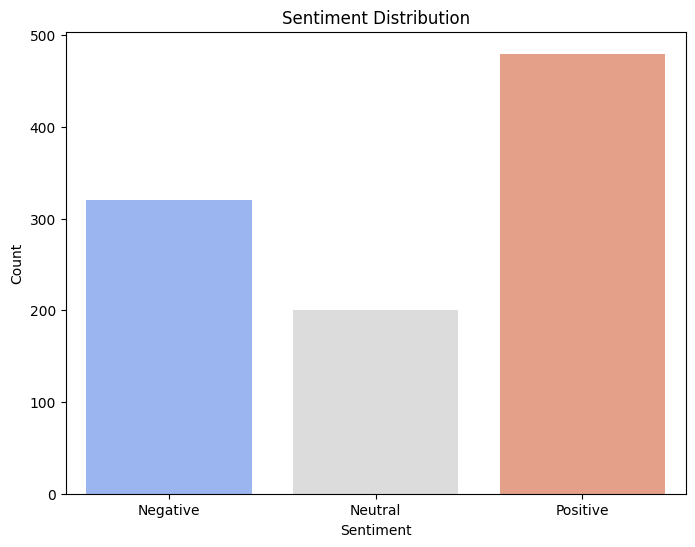

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment_label',data=df,palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
positive_tweets=df[df['sentiment_label']=='Positive']['Tweet']
negative_tweets = df[df['sentiment_label'] == 'Negative']['Tweet']


In [ ]:
positive_words=' '.join(positive_tweets)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

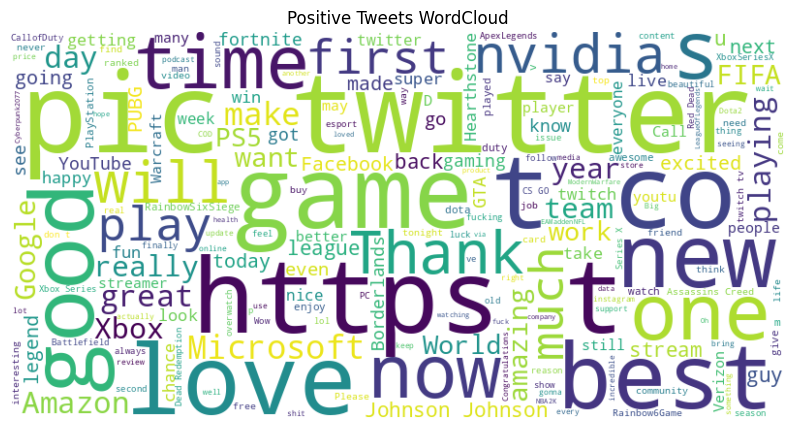

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets WordCloud')
plt.show()

In [ ]:
negative_words=' '.join(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

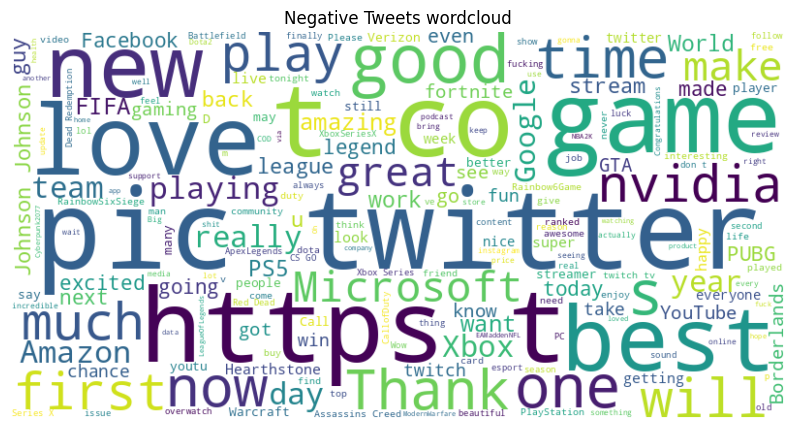

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_negative,interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets wordcloud')
plt.show()

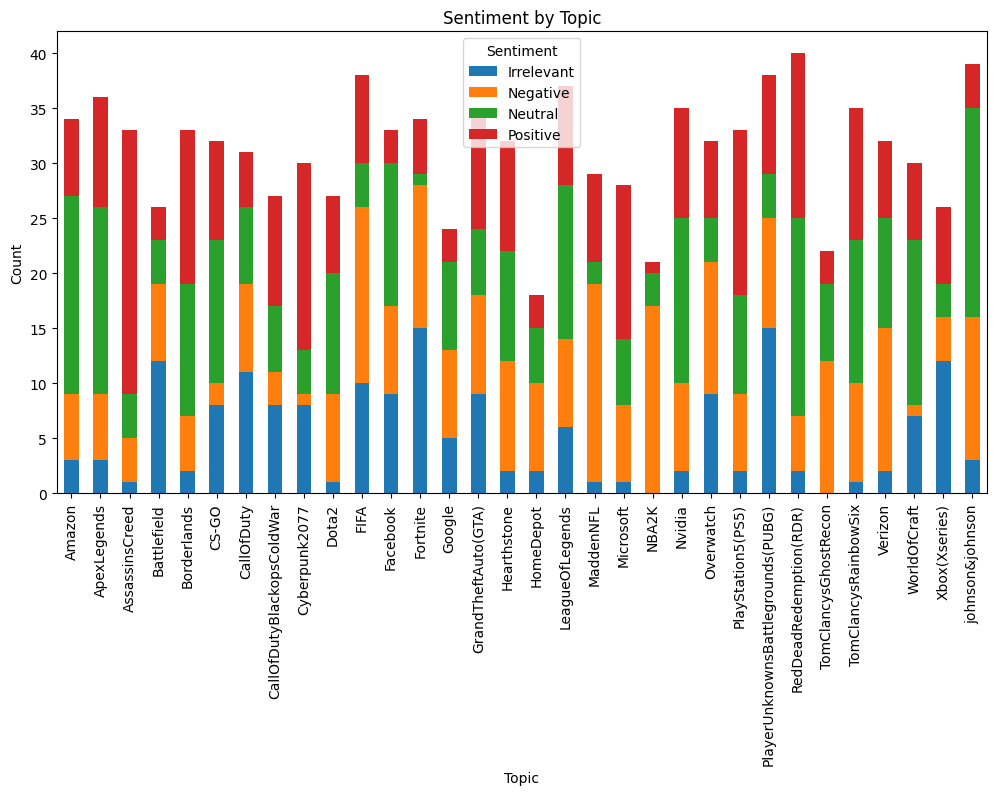

In [ ]:
df.groupby('Topic')['Sentiment'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sentiment by Topic')
plt.ylabel('Count')
plt.xlabel('Topic')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
df

,Tweet_ID,Topic,Sentiment,Tweet,sentiment,sentiment_label
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,-0.143750,Negative
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,0.000000,Neutral
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,-0.400000,Negative
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",-0.350000,Negative
4,4433,Google,Neutral,Now the President is slapping Americans in the...,0.250000,Positive
...,...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,0.233333,Positive
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,0.262500,Positive
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,-0.800000,Negative
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,0.025000,Positive


In [ ]:
if 'entity' in df.columns:
    entity_sentiment = df.groupby('entity')['sentiment_label'].value_counts().unstack().fillna(0)
    entity_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title('Sentiment by Entity')
    plt.ylabel('Count')
    plt.xlabel('Entity')
    plt.show()

In [ ]:
plt.show()

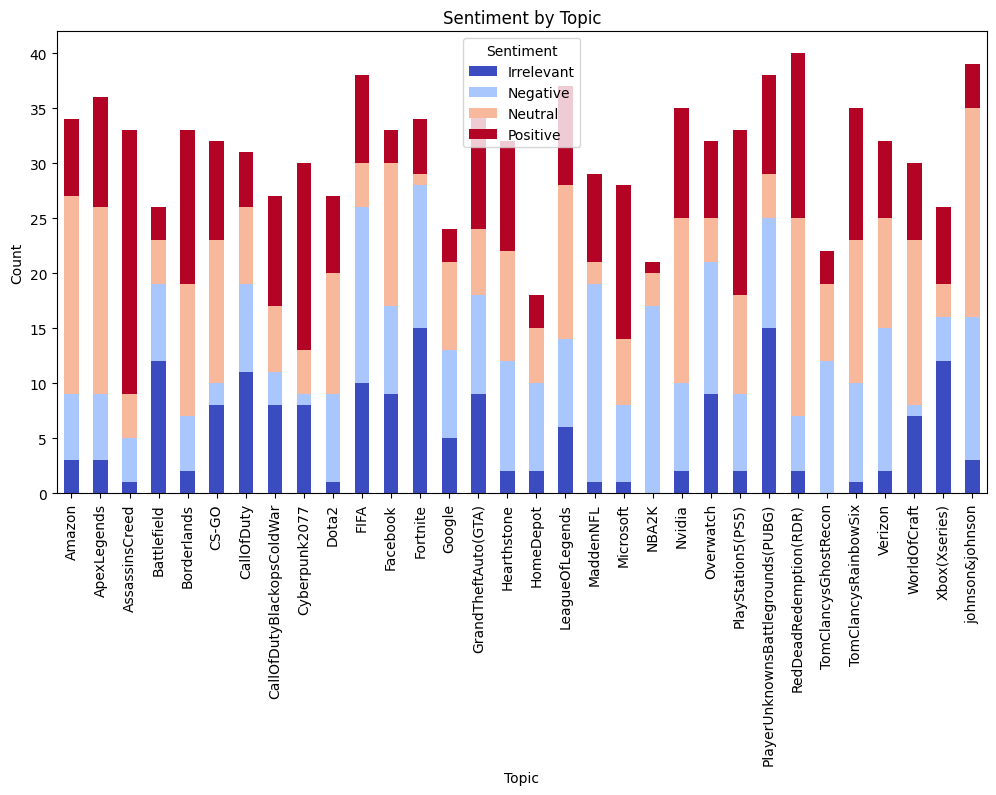

In [ ]:
if 'Topic' in df.columns:
    topic_sentiment = df.groupby('Topic')['Sentiment'].value_counts().unstack().fillna(0)
    topic_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
    plt.title('Sentiment by Topic')
    plt.ylabel('Count')
    plt.xlabel('Topic')
    plt.legend(title='Sentiment')
    plt.show()
else:
    print("The dataset does not contain a 'Topic' column.")

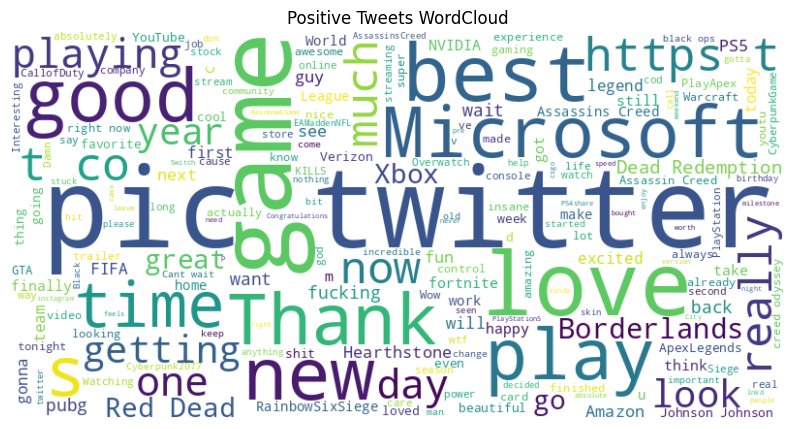

In [ ]:
from wordcloud import WordCloud

# WordCloud for Positive Tweets
positive_tweets = ' '.join(df[df['Sentiment'] == 'Positive']['Tweet'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets WordCloud')
plt.show()

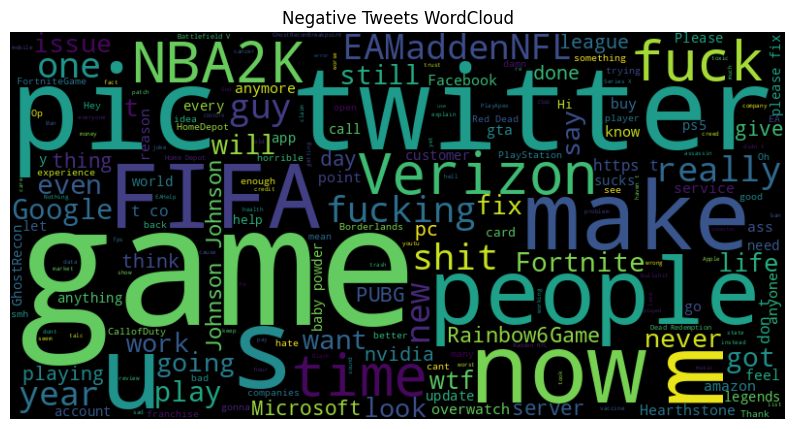

In [ ]:
negative_tweets = ' '.join(df[df['Sentiment'] == 'Negative']['Tweet'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets WordCloud')
plt.show()

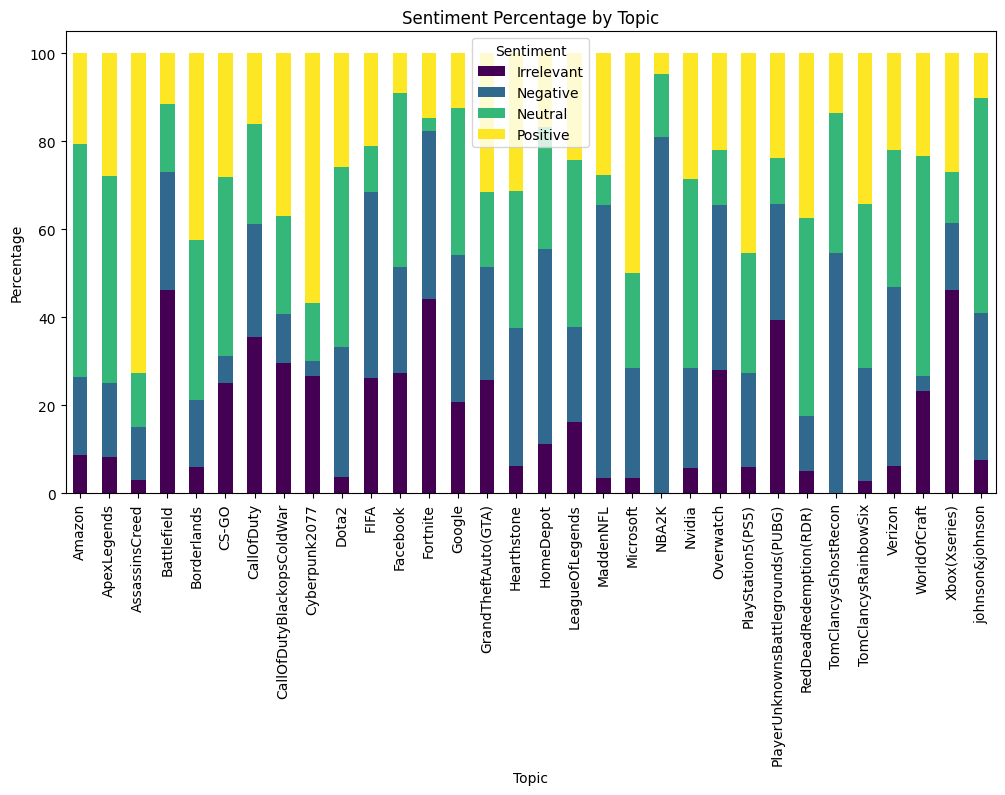

In [ ]:
topic_sentiment_percentage = df.groupby('Topic')['Sentiment'].value_counts(normalize=True).unstack() * 100
topic_sentiment_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Sentiment Percentage by Topic')
plt.ylabel('Percentage')
plt.xlabel('Topic')
plt.legend(title='Sentiment')
plt.show()